100%|██████████| 22/22 [00:00<00:00, 76.13it/s]


grid_y range: -4.318818157119732 to 0.41134960606219195
First column of grid_y (unique values): [-4.31881816]
ylim: (-3.5, -1.1)
Selected indices: [  0   0   0 ... 199 199 199]
z min: -4.31635177436898, z max: 0.11008721914835977


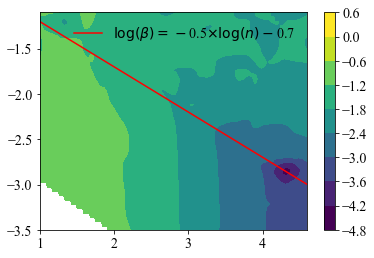

In [7]:
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from matplotlib import font_manager
from matplotlib import rcParams

rcParams["legend.fontsize"] = 14
rcParams["font.family"] = "Times New Roman"
rcParams["legend.title_fontsize"] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 14
data = []
for m in tqdm([10, 20, 40, 50, 60, 70, 80, 90,  100, 200, 400, 800, 1000, 2000, 2500, 3000, 4000, 6000, 8000, 10000, 20000, 40000]): 
    filename = f"data_pkl_4beta_contour/sigma01_n{m}.pkl"
    with open(filename, 'rb') as file: 
        loaded_data = pickle.load(file) 
    res = loaded_data.trials
    sorted_trials = sorted(res, key=lambda x: x["misc"]["vals"]['beta'][0])
    beta_values = [item["misc"]["vals"]['beta'][0] for item in sorted_trials]
    loss_values = [(pd.DataFrame(item["result"]['results'])["es_mlre"]**2).mean() for item in sorted_trials]
    data.append({"n": m, "loss_min": min(loss_values), "beta_best": beta_values[loss_values.index(min(loss_values))]})

data_df = pd.DataFrame(data)

y_flag = (data_df["n"].apply(np.log10) * (-0.5) - 0.7).apply(lambda x: 10**x)
x_flag = data_df["n"]
#-------------------------------------------
data = []
for m in tqdm([10, 20, 40, 50, 60, 70, 80, 90, 100, 200, 400, 800, 1000, 2000, 2500, 3000, 4000, 6000, 8000, 10000, 20000, 40000]): 
    filename = f"data_pkl_4beta_contour/sigma01_n{m}.pkl"
    with open(filename, 'rb') as file: 
        loaded_data = pickle.load(file) 
    res = loaded_data.trials
    sorted_trials = sorted(res, key=lambda x: x["misc"]["vals"]['beta'][0])
    beta_values = [item["misc"]["vals"]['beta'][0] for item in sorted_trials]
    loss_values = [(pd.DataFrame(item["result"]['results'])["es_mlre"]**2).mean() for item in sorted_trials]
    for beta, loss in zip(beta_values, loss_values):
        data.append({"n": m, "loss": np.log10(loss), "beta": beta})
data_df = pd.DataFrame(data)

data_df['n'] = data_df['n'].apply(np.log10)
data_df['beta'] = data_df['beta'].apply(np.log10)

grid_x, grid_y = np.mgrid[data_df['n'].min():data_df['n'].max():200j, data_df['beta'].min():data_df['beta'].max():100j]
grid_z = griddata((data_df['n'], data_df['beta']), data_df['loss'], (grid_x, grid_y), method='cubic')
grid_z.shape

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(x_flag.apply(np.log10), np.log10(y_flag), c='r', linestyle="-", label=r"$\log(\beta)= -$" + f"{0.5}" + r"$\times \log(n)-$" + f"{0.7}" )  

ylim = (-3.5, -1.1)
print(f"grid_y range: {grid_y.min()} to {grid_y.max()}")
if ylim[0] < grid_y.min() or ylim[1] > grid_y.max():
    print(f"Warning: ylim {ylim} is outside the range of grid_y. Adjusting to match grid_y.")
    ylim = (max(ylim[0], grid_y.min()), min(ylim[1], grid_y.max()))
ax1.set_ylim(*ylim)
print("First column of grid_y (unique values):", np.unique(grid_y[:, 0]))
print(f"ylim: {ylim}")
y_indices = np.where((grid_y >= ylim[0]) & (grid_y <= ylim[1]))[0]
print("Selected indices:", y_indices)

if len(y_indices) == 0:
    raise ValueError(f"No data found within the specified ylim {ylim}. Adjust the range.")

cropped_z = grid_z[y_indices, :]  
cropped_y = grid_y[y_indices, :]  
cropped_x = grid_x[y_indices, :]  
cropped_z = np.ma.masked_invalid(cropped_z)
cropped_x = np.ma.masked_invalid(cropped_x)
cropped_y = np.ma.masked_invalid(cropped_y)
print(f"z min: {cropped_z.min()}, z max: {cropped_z.max()}")
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=cropped_z.min(), vmax=cropped_z.max())
contour = ax1.contourf(cropped_x, cropped_y, cropped_z, norm=norm, cmap='viridis')
colorbar = plt.colorbar(contour)

font = font_manager.FontProperties(family='Times New Roman', size=14)
ax1.legend()
legend = ax1.legend(frameon=False, title=None, loc='upper right')
plt.show()
fig1.savefig("data_pkl_4beta_contour/contour_0d5.pdf", dpi=7200, bbox_inches='tight')
plt.show()